# Задание 1. A/B–тестирование

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Настройка параметров для графиков
sns.set_style(style='white') 
sns.set(rc={
    'figure.figsize':(15,5), 
    'axes.facecolor': 'white'})

In [3]:
groups = pd.read_csv('groups.csv', sep = ';')
groups.head()

,id,grp
0,1489,B
1,1627,A
2,1768,B
3,1783,B
4,1794,A


In [4]:
groups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74484 entries, 0 to 74483
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      74484 non-null  int64 
 1   grp     74484 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [5]:
groups.isna().sum()

id     0
grp    0
dtype: int64

In [6]:
# Явно укажем тип для колонки grp
groups['grp'] = groups['grp'].astype('str')

In [7]:
groups_add = pd.read_csv('group_add.csv', sep = ',')
groups_add.head()

,id,grp
0,5694584,B
1,5694830,B
2,5695057,B
3,5698872,B
4,5699067,B


In [8]:
groups_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      92 non-null     int64 
 1   grp     92 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [9]:
groups_add.isna().sum()

id     0
grp    0
dtype: int64

In [10]:
# Явно укажем тип для колонки grp
groups_add['grp'] = groups_add['grp'].astype('str')

In [11]:
active_studs = pd.read_csv('active_studs.csv')
active_studs.head()

,student_id
0,581585
1,5723133
2,3276743
3,4238589
4,4475369


In [12]:
active_studs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8341 entries, 0 to 8340
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   student_id  8341 non-null   int64
dtypes: int64(1)
memory usage: 65.3 KB


In [13]:
checks = pd.read_csv('checks.csv', sep = ';')
checks.head()

,student_id,rev
0,1627,990.0
1,3185,690.0
2,25973,690.0
3,26280,690.0
4,100300,990.0


In [14]:
checks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  541 non-null    int64  
 1   rev         541 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.6 KB


В active_studs и checks типы в колонках явно определены, на наличие Nan их проверять смысла нет (если б были Nan, то стоял тип object)

Для начала объеденим данные о группах в один DataFrame, а так же оставим тех пользователей, которые заходили на платформу во время проведения эксперемента

In [15]:
groups_full = pd.concat([groups, groups_add]).rename({'id':'student_id'}, axis = 1)

In [16]:
groups_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74576 entries, 0 to 91
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   student_id  74576 non-null  int64 
 1   grp         74576 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.7+ MB


In [17]:
groups_full.head()

,student_id,grp
0,1489,B
1,1627,A
2,1768,B
3,1783,B
4,1794,A


In [18]:
groups_full['grp'].value_counts()

B    59883
A    14693
Name: grp, dtype: int64

In [19]:
groups_exp = active_studs.merge(groups_full, how='inner', on='student_id')

In [20]:
groups_exp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8341 entries, 0 to 8340
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   student_id  8341 non-null   int64 
 1   grp         8341 non-null   object
dtypes: int64(1), object(1)
memory usage: 195.5+ KB


In [21]:
groups_exp.head()

,student_id,grp
0,581585,A
1,5723133,A
2,3276743,B
3,4238589,A
4,4475369,B


In [22]:
groups_exp = groups_exp.merge(checks, how='left', on='student_id')

In [23]:
groups_exp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8341 entries, 0 to 8340
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  8341 non-null   int64  
 1   grp         8341 non-null   object 
 2   rev         392 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 260.7+ KB


In [24]:
checks.shape[0] - groups_exp['rev'].notna().sum()

149

Количество людей совершивших покупку из таблицы checks и и в нашем фрейме не совпадают, так как данные об id этих пользователей нет в других таблицах, то их учитывать не будем(не известно к какой группе принадлежат)

In [25]:
groups_exp = groups_exp.fillna(0)

In [26]:
groups_exp['rev'] = groups_exp['rev'].round(2)
groups_exp.head()

,student_id,grp,rev
0,581585,A,0.0
1,5723133,A,0.0
2,3276743,B,0.0
3,4238589,A,0.0
4,4475369,B,0.0


In [27]:
groups_exp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8341 entries, 0 to 8340
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  8341 non-null   int64  
 1   grp         8341 non-null   object 
 2   rev         8341 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 260.7+ KB


После всех преобразований появился DataFrame groups_exp, все пользователи которого заходили на сайт во время проведения эксперемента.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Количество')

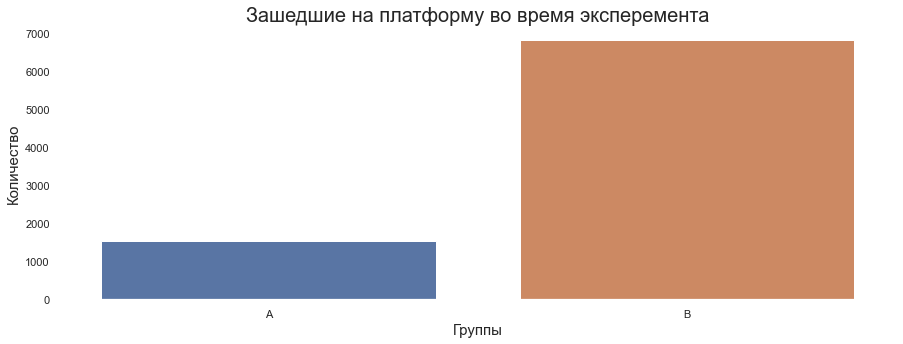

In [28]:
sns.countplot(groups_exp['grp'])
plt.title('Зашедшие на платформу во время эксперемента', fontsize= 20)
plt.xlabel("Группы", fontsize= 15)
plt.ylabel("Количество", fontsize= 15)

Text(0, 0.5, 'Количество')

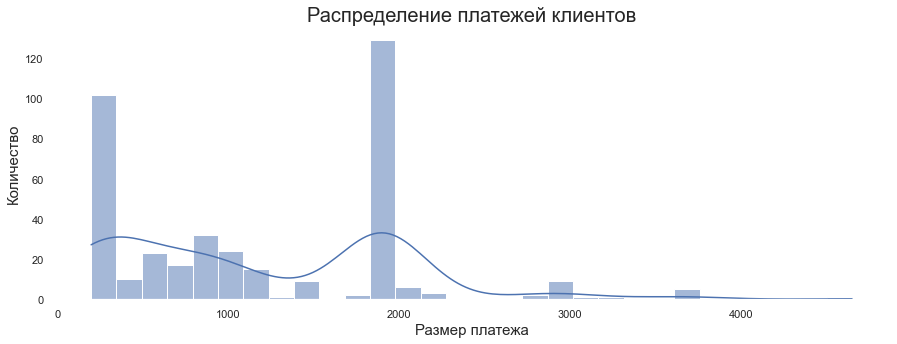

In [29]:
sns.histplot(x = groups_exp[groups_exp['rev'] != 0]['rev'], kde=True, bins=30)
plt.title('Распределение платежей клиентов', fontsize= 20)
plt.xlabel("Размер платежа", fontsize= 15)
plt.ylabel("Количество", fontsize= 15)

Text(0.5, 1.0, 'Распределение платежей клиентов в группах')

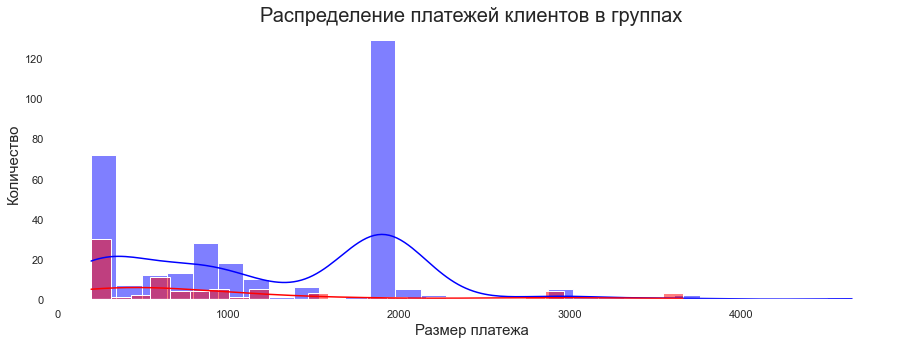

In [30]:
sns.histplot(x = groups_exp[(groups_exp['rev'] != 0) & (groups_exp['grp'] == 'B')]['rev'], kde=True, bins=30, color = 'blue')
plt.xlabel("Размер платежа", fontsize= 15)
plt.ylabel("Количество", fontsize= 15)

sns.histplot(x = groups_exp[(groups_exp['rev'] != 0) & (groups_exp['grp'] == 'A')]['rev'], kde=True, bins=30, color = 'red')
plt.xlabel("Размер платежа", fontsize= 15)
plt.ylabel("Количество", fontsize= 15)
plt.title('Распределение платежей клиентов в группах', fontsize= 20)

In [31]:
groups_exp[groups_exp['rev'] != 0]['rev'].value_counts().sort_values(ascending=False).head()

1900.0    128
290.0      70
199.0      32
840.0      24
990.0      22
Name: rev, dtype: int64

   Как мы видим, присутствует дисбаланс классов(в целевой группе участников больше, чем в 4 раза). Распределение покупок говорит о том, что в основном преобретают услуги до 2000 рублей в обеих группах, но у целевой группы наблюдается всплеск покупок на сумму 1900. Это очень подозрительно, так как новая механика не могла так повлиять на покупки пользователей(могла, но не так аномально сильно).
    
   Так как нас интересует информация о влиянии новой механики на покупки пользователей, то посмотрим на метрики CR, ARPU, ARPPU

In [32]:
met_df = groups_exp.groupby('grp').agg({'student_id':'count', 'rev':'sum'})
met_df = met_df.rename({'student_id' : 'Count', 'rev' : 'Total_profit'}, axis = 1)
met_df['Bought'] = groups_exp[groups_exp['rev'] != 0].groupby('grp').agg({'rev':'count'})['rev']
met_df['CR'] = round((met_df['Bought'] / met_df['Count']) * 100, 2)
met_df['ARPU'] = round(met_df['Total_profit'] / met_df['Count'], 2)
met_df['ARPPU'] = round(met_df['Total_profit'] / met_df['Bought'], 2)
met_df

,Count,Total_profit,Bought,CR,ARPU,ARPPU
grp,,,,,,
A,1538,72820.0,78,5.07,47.35,933.59
B,6803,394974.0,314,4.62,58.06,1257.88


Видно, что у целевой группы упала конверсия в покупку, но при этом увеличился ARPU и ARPPU, виновник этому аномальные преобретения услуги стоимостью 1900 рублей как видно из рассуждений выше.

В итоге А/В-тест будем проводить для метрик CR, так как конверсия в покупку очень важна и скорее всего на её увеличение была расчитана новая механика, а на ARPPU и ARPU оказывает аномальное влияние некое неучтённое событие(спец. предложение, скидка, акция) и проводить тестирование для этих метрик не имеет смысла, так как на эти показатели вероятно повлияла не новая механика.

Для проверки гипотезы будем использовать Хи-квадрат.

In [33]:
from scipy.stats import chi2_contingency

In [34]:
#Создадим таблицу сопряжённости
hi_df = met_df[['Count', 'Bought']].rename({'Count':'Not_Bought'}, axis = 1)
hi_df['Not_Bought'] = hi_df['Not_Bought'] - hi_df['Bought']
hi_df

,Not_Bought,Bought
grp,,
A,1460,78
B,6489,314


H0 - изменения конверсии между группами статистически незначимы

H1 - изменения конверсии между группами статистически значимы

In [35]:
p = chi2_contingency(hi_df, correction=False)[1]
p

0.44547028437158964

P-value намного больше 0.05, у нас нет никаких оснований отклонить нулевую гипотезу, следовательно, статистически значимых различий между группами нет 

## Выводы:

####   1. Главной метрикой для проверки была выбрана CR, так как на мой взгляд данные корректны только для проведения эксперемента с ней. Эксперемент показал отсутствие взаимосвязи между новой механикой и конверсией в покупки. Запуск новой механики нецелесообразен.
####   2. Явный дисбаланс классов, я понимаю, что повлиять на посещение сайта пользователями во время эксперемента возможностей немного, но тогда возникают вопросы к данным для эксперемента(в группе В изначально пользователей в 4 раза больше)
####   3. Аномально большое количество покупок на сумму в 1900 рублей у группы В, надо более детально изучить причину, если действительно повлияла новая механика, то можно провести А/В-тест для метрик ARPU и ARPPU.

# Задание 2. SQL
### 2.1 Очень усердные ученики.

#### 2.1.1 Условие

Образовательные курсы состоят из различных уроков, каждый из которых состоит из нескольких маленьких заданий. Каждое такое маленькое задание называется "горошиной".

Назовём очень усердным учеником того пользователя, который хотя бы раз за текущий месяц правильно решил 20 горошин.

#### 2.1.2 Задача

Дана таблица default.peas:

(st_id, int, ID ученика), (timest, timestamp, Время решения карточки), (correct, bool, Правильно ли решена горошина), (subject, text, Дисциплина, в которой находится горошина)

Необходимо написать оптимальный запрос, который даст информацию о количестве очень усердных студентов.

NB! Под очень усердным студентом мы понимаем студента, который правильно решил 20 задач за текущий месяц.

In [36]:
import pandahouse as ph

In [37]:
#создаем словарь connection с нужными параметрами для подключения к базе
connection_default = {'host': 'http://clickhouse.beslan.pro:8080',
                      'database':'default',
                      'user':'student', 
                      'password':'dpo_python_2020'
                     }

In [38]:
#Пишем запрос и получаем данные из clickhouse в pandas dataframe
query = """

SELECT

    COUNT(*) AS count_student
    
FROM
        (
            SELECT
                st_id,
                correct,
                COUNT(correct) AS F
            FROM default.peas
            WHERE
                correct = 1
            GROUP BY
                st_id,
                correct
            HAVING 
                F >= 20
        )
    
"""
df = ph.read_clickhouse(query, connection=connection_default)
df

,count_student
0,136


### 2.2 Оптимизация воронки

#### 2.2.1 Условие

Образовательная платформа предлагает пройти студентам курсы по модели trial: студент может решить бесплатно лишь 30 горошин в день. Для неограниченного количества заданий в определенной дисциплине студенту необходимо приобрести полный доступ. Команда провела эксперимент, где был протестирован новый экран оплаты.

#### 2.2.2 Задача

Дана таблицы: default.peas (см. выше), default.studs:

(st_idc, int, ID ученика), (test_grp, text, Метка ученика в данном эксперименте)

и default.final_project_check:


(st_idc, int, ID ученика), (sale_time, timestamp, Время покупки), (money, int, Цена, по которой приобрели данный курс),

(subject, text, Дисциплина, на которую приобрели полный доступ)

Необходимо в одном запросе выгрузить следующую информацию о группах пользователей:

ARPU 
ARPAU 
CR в покупку 
СR активного пользователя в покупку 
CR пользователя из активности по математике (subject = ’math’) в покупку курса по математике
ARPU считается относительно всех пользователей, попавших в группы.

Активным считается пользователь, за все время решивший больше 10 задач правильно в любых дисциплинах.

Активным по математике считается пользователь, за все время решивший 2 или больше задач правильно по математике.

In [39]:
#Пишем запрос и получаем данные из clickhouse в pandas dataframe
query1 = """

SELECT

    test_grp,
    sum(money) / COUNT(DISTINCT st_id) AS ARPU,
    sumIf(money, FULL_correct > 10) / countIf(DISTINCT st_id, FULL_correct > 10) AS ARPAU,
    (countIf(DISTINCT st_id, money > 0) / count(DISTINCT st_id)) * 100 AS CR,
    (countIf(DISTINCT st_id, (money > 0) AND (FULL_correct > 10)) / countIf(DISTINCT st_id, FULL_correct > 10)) * 100 AS CR_ACTIV,
    (countIf(DISTINCT st_id, (money > 0) AND (Math_correctid > 2) AND (subject_buy = 'Math')) / countIf(DISTINCT st_id, Math_correctid > 2)) * 100 AS CR_ACTIV_Math

FROM    
        (   
            SELECT
                S.st_id AS st_id,
                F.FULL_correct AS FULL_correct,
                M.Math_correct AS Math_correctid,
                S.test_grp AS test_grp,
                FP.money AS money,
                FP.subject AS subject_buy
            FROM 
                default.studs AS S
            FUll JOIN
                ( --Выводим общее число решённых горошин
                    SELECT 
                        st_id,
                        SUM(correct) AS FULL_correct
                    FROM default.peas
                    GROUP BY
                        st_id
                 )   AS F
            ON
                S.st_id = F.st_id   
                
            FULL JOIN
                ( --Выводим число решённых горошин по математике
                    SELECT 
                        st_id,
                        SUM(correct) AS Math_correct
                    FROM default.peas
                    WHERE    
                        subject = 'Math'
                    GROUP BY
                        st_id    
                 )   AS M
            ON
                S.st_id = M.st_id
                
            FULL JOIN
                default.final_project_check AS FP
            ON
                S.st_id = FP.st_id       
        )
        
GROUP BY
    test_grp
    
"""
df = ph.read_clickhouse(query1, connection=connection_default)
df

,test_grp,ARPU,ARPAU,CR,CR_ACTIV,CR_ACTIV_Math
0,control,4540.983607,10393.700787,4.918033,11.023622,6.122449
1,pilot,11508.474576,29739.583333,10.847458,26.041667,9.523810


### Задание 3. Python
#### 3.1 Задача

1. Реализуйте функцию, которая будет автоматически подгружать информацию из дополнительного файла groups_add.csv (заголовки могут отличаться) и на основании дополнительных параметров пересчитывать метрики.

2. Реализуйте функцию, которая будет строить графики по получаемым метрикам.

In [40]:
def add_metrix(groups, groups_add, active_studs, checks):
    
    groups_add.rename(columns={groups_add.columns[0]: groups.columns[0]}, inplace=True)
    active_studs.rename(columns={active_studs.columns[0]: groups.columns[0]}, inplace=True)
    checks.rename(columns={checks.columns[0]: groups.columns[0]}, inplace=True)
    
    groups_full = pd.concat([groups, groups_add])
    groups_full = active_studs.merge(groups_full, how='inner', on=groups.columns[0])
    groups_full = groups_full.merge(checks, how='left', on=groups.columns[0])
    
    met_df = groups_full.groupby('grp', as_index=False).agg({'id':'count', 'rev':'sum'})
    met_df = met_df.rename({'id' : 'Count', 'rev' : 'Total_profit'}, axis = 1)
    met_df['Bought'] = groups_full[groups_full['rev'] != 0].groupby('grp', as_index=False).agg({'rev':'count'})['rev']
    met_df['CR'] = round((met_df['Bought'] / met_df['Count']) * 100, 2)
    met_df['ARPU'] = round(met_df['Total_profit'] / met_df['Count'], 2)
    met_df['ARPPU'] = round(met_df['Total_profit'] / met_df['Bought'], 2)
    
    return met_df

In [41]:
add_metrix(groups, groups_add, active_studs, checks)

,grp,Count,Total_profit,Bought,CR,ARPU,ARPPU
0,A,1538,72820.0000,78,5.07,47.35,933.59
1,B,6803,394974.0035,314,4.62,58.06,1257.88


In [42]:
def add_graph(df_metrix):
    
    sns.set_theme(style="ticks")
    fig, axs = plt.subplots(nrows=3, figsize=(15, 20))
    
    sns.barplot(x="grp", y="CR", data=df_metrix, ax=axs[0]).set_title('CR', fontsize= 20)
    sns.barplot(x="grp", y="ARPU", data=df_metrix, ax=axs[1]).set_title('ARPU', fontsize= 20)
    sns.barplot(x="grp", y="ARPPU", data=df_metrix, ax=axs[2]).set_title('ARPPU', fontsize= 20)
    

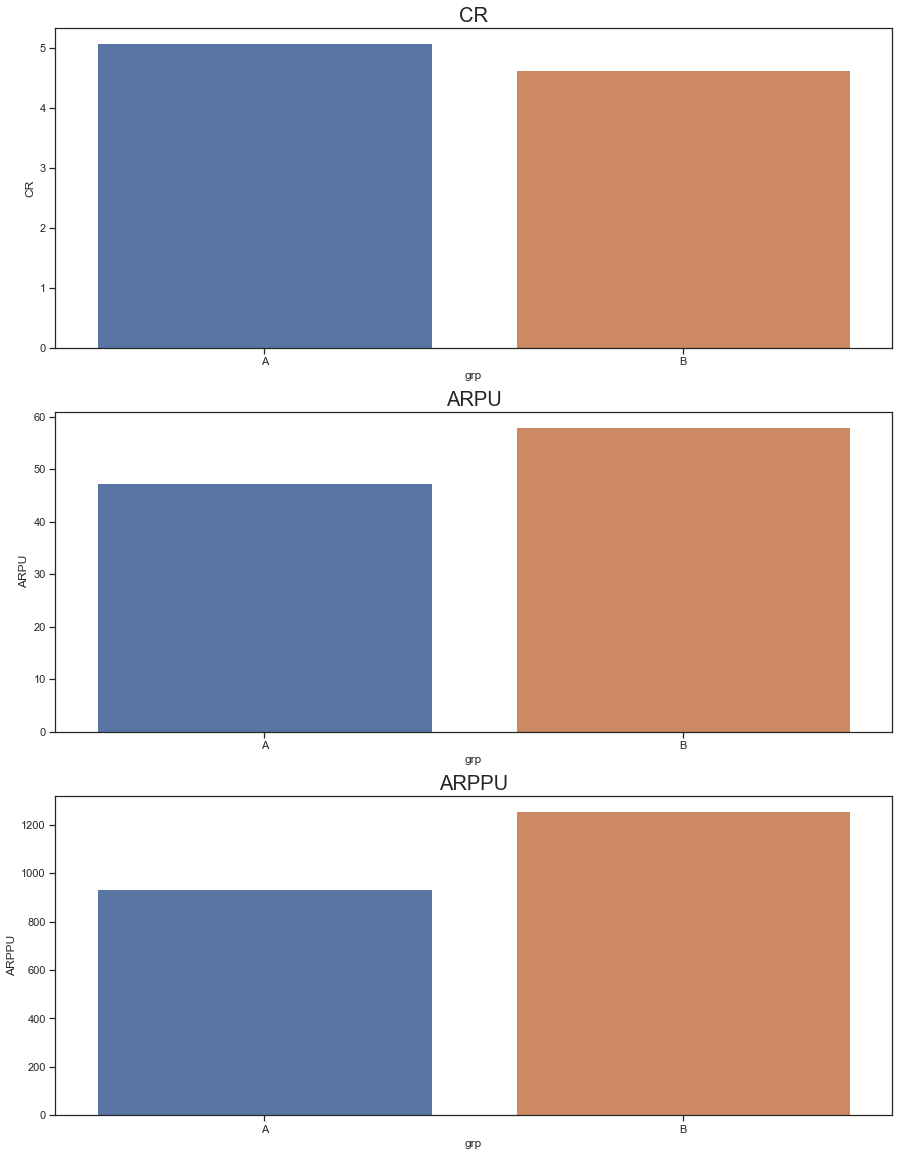

In [43]:
add_graph(add_metrix(groups, groups_add, active_studs, checks))